In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
# Function to load a CSV file from a relative path - No Actual Use in learning machine learning
from pathlib import Path

def load_csv(relative_path: str) -> pd.DataFrame:
    file_path = Path.cwd() / Path(relative_path)
    if not file_path.exists():
        raise FileNotFoundError(f"CSV not found at: {file_path}")
    return pd.read_csv(file_path)

In [3]:
# Creating a dataframe which contain Area and their Prices to train the model
df = load_csv('data/Training/homeprices.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


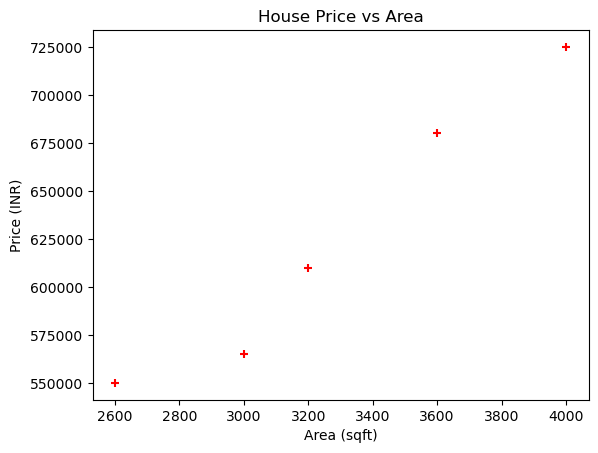

In [4]:
# How is data looking now
%matplotlib inline

plt.scatter(df.area, df.price, color='red', marker='+')
plt.xlabel('Area (sqft)')
plt.ylabel('Price (INR)')
plt.title('House Price vs Area')
plt.show()


In [5]:
# Create linear regression object/ Fitting the data/ Training the model
reg = linear_model.LinearRegression()
reg.fit(df[['area']],df.price)

LinearRegression()

In [6]:
# Testing the Trained Model for a specific value - 3300sqft
reg.predict(pd.DataFrame([[3300]], columns=['area']))

array([628715.75342466])

<div align="center">
  <h3>📊 How Linear Regression Model Works</h3>
</div>

Linear regression fits a straight line through the data points such that the total error (the vertical difference between predicted and actual values) is minimized.

We define the error for each point as Δᵢ — the vertical difference between the actual price and the predicted price (on the line).  
Our objective is to minimize the **sum of the squares of these errors**:

$$
\boxed{\text{Minimize} \quad \sum_{i=1}^{n} (\Delta_i)^2}
$$

---

<div align="center">
  <p><strong>1️⃣ Possible Solutions — Different Lines</strong></p>
  <img src="images/Possible%20Solution.png" width="500"/>
</div>

🔹 Multiple lines (red, orange, blue) are tested during model training.  
🔹 The **blue** line fits best by yielding the **lowest squared error**.  
🔹 Uses **Gradient Descent** to optimize the slope **(m)** and intercept **(b)**.

---

<div align="center">
    <p><strong>2️⃣ Model Working —  Minimize Δ<sub>i</sub><sup>2</sup></strong></p>
    <img src="images/Model%20Working.png" width="500"/>
</div>

🔹 Each red cross represents an actual data point.  
🔹 The vertical dashed lines (Δ₁, Δ₂…) show prediction errors.  
🔹 The goal is to choose the line that makes the **sum of these squared distances** as **small as possible**.

---

<div align="center">
  <p><strong>3️⃣ Prediction on Test Data</strong></p>
  <img src="images/Test%20Data.png" width="500"/>
</div>

📌 Given **area = 3300**, the model predicts the price as **628,715** (point on the line).  
This demonstrates how the trained model makes predictions on new data.

---


In [7]:
# How it works (seeing how we got that answer for 3300sqft)
# y = mx + b  -- Eqn of line
 
reg.coef_  #m (Slope)

array([135.78767123])

In [8]:
reg.intercept_  #b (Intercept)

180616.43835616432

In [9]:
# y = mx + b
# price = m * area + b
(135.78767123) * (3300) + (180616.43835616432)  # This will give us the same answer as predicted by the model

628715.7534151643

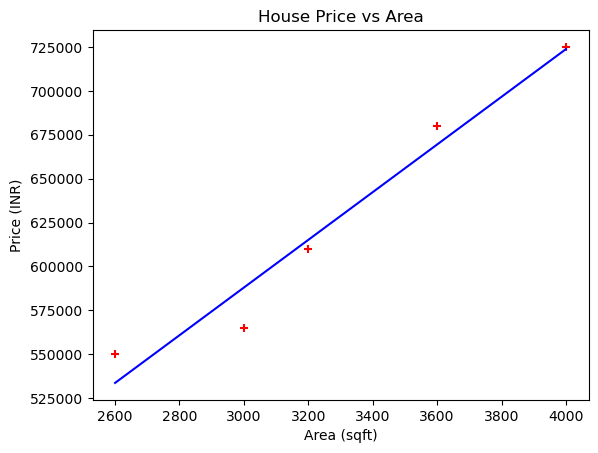

In [10]:
# Visual Representation of the Linear Regression
%matplotlib inline

plt.xlabel('Area (sqft)')
plt.ylabel('Price (INR)')
plt.title('House Price vs Area')
plt.scatter(df.area, df.price, color='red', marker='+')
plt.plot(df.area, reg.predict(df[['area']]), color='blue')
plt.show()


In [11]:
# Now Actually Using/Testing the model-----------------------------------------------------------------------------------------

# Creating new dataframe which contain Area to predict their price
test_df = load_csv('data/Testing/areas.csv')
test_df.head(3) # Showing Top 3 values

,area
0,1000
1,1500
2,2300


In [12]:
# Testing model on Test Areas
reg.predict(test_df)

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [13]:
# Storing the predicted prices in a variable to store them in a CSV file
p = reg.predict(test_df)

In [14]:
# Creating a new column "prices" in the test DataFrame to hold the predicted prices
test_df['prices'] = p

In [15]:
# Export the test DataFrame (with predicted prices) to a CSV file for further analysis or sharing
test_df.to_csv("data/Predicted/prediction.csv", index=False)